<a href="https://colab.research.google.com/github/jeffersonverissimo/Data_Science/blob/master/An%C3%A1lise_Explorat%C3%B3ria_dos_Dados_de_Viol%C3%AAncia_do_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://images6.alphacoders.com/105/1052781.jpg)

# **ANÁLISE EXPLORATÓRIA DOS DADOS DE SEGURANÇA PÚBLICA DO RIO DE JANEIRO**
---
---

O Estado do Rio de Janeiro é conhecido por oferecer uma das melhores experiências turísticas do mundo, apresentando diversas atrações históricas, naturais e culturais. A sua capital, que possui o mesmo nome, é o destino mais procurado por estrangeiros que visitam o Brasil a lazer. O Estado se estende por mais de 43.780 km² e apesar de ser um dos menores estados brasileiros, concentra quase 9% da população do país, sendo a terceira maior, com cerca de 17,2 milhões de habitantes. O RJ também apresenta o segundo maior Produto Interno Bruto (PIB) do país (R$ 671,3 bilhões em 2019) e ocupa o quarto lugar no Índice de Desenvolvimento Humano (IDH).

O Rio de Janeiro oferece atrações para todos os gostos, o turista pode desfrutar o dia pelas  praias, parques, museus ou curtir a noite em teatros, shows e estádios de futebol. À primeira vista, o RJ parece realmente um ótimo lugar para curtir em qualquer época do ano. Mas será que o Estado oferece uma boa segurança?

**O Rio de Janeiro é Perigoso?**

Para conseguir responder esta pergunta, a partir dos meus estudos de ciência de dados, fiz uma análise exploratória dos dados de violência no estado do Rio de Janeiro utilizando informações extraídas dos conjuntos de dados disponibilizados pelo Instituto de Segurança Pública do Governo do RJ através do [portal ISPDados](http://www.ispdados.rj.gov.br/), que vem cadastrando os dados desde o ano de 1991.

Acessando [este link](http://www.ispdados.rj.gov.br/estatistica.html), você pode ter acesso a diversos conjuntos de dados de segurança pública do Rio de Janeiro, inclusive o dataset que foi utilizado para realizar o presente projeto para realizar sua própria análise.

Neste artigo, apresento as principais conclusões obtidas da análise. Contudo, você pode ver o projeto em seus mínimos detalhes, incluindo gráficos mostrando o comportamento dos dados ao longo dos anos e todos os códigos através deste link.

### **Aquisição dos Dados**


In [0]:
# Importando os pacotes necessários.

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
# Devemos importar também o arquivo a ser analisado listings.csv para um DataFrame

df = pd.read_csv("http://www.ispdados.rj.gov.br/Arquivos/DOMensalEstadoDesde1991.csv",sep=';')

### **Análise Inicial dos Dados**

Antes de começarmos de fato a análise dos nossos dados, podemos extratir algumas informções básicas como:

*   Dimensão do *dataset*;
*   Variáveis presentes;
*   Tipos das variáveis;
*   "Aparência" geral do *dataset*;
*   Verificar valores ausentes; etc


 ---
 **Qual o tamanho do nosso *dataset*?**

 Através do comando "df.shape", conseguirmos ver a dimensão do nosso conjunto de dados.

In [138]:
df.shape

(349, 58)

Ou seja, nosso conjunto de dados possui 349 linhas e 58 colunas

---

**Podemos, através do comando "df.columns" visualizar o nomes de todas as colunas existentes no nosso conjunto de dados.**

In [139]:
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mo

---

**Quais os tipos de variáveis presentes no *dataset*?**

In [140]:
df.dtypes

vano                           int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
hom_por_interv_policial       object
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_comercio                 int64
roubo_residencia               int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_transeunte               int64
roubo_em_coletivo              int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_celular                 object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
total_roubos                   int64
furto_veiculos                 int64
f

---

**Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.**

In [141]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,,15,,672,162,3051,,,,350,188,1174,63,967,381,37,,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,1348,1174,63,,3
1,1991,2,732,,17,,749,175,3421,,,,357,171,1097,64,963,432,35,,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,1395,1097,64,,3
2,1991,3,713,,25,,738,216,3613,,,,443,191,1265,71,963,422,43,,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,1385,1265,71,,3
3,1991,4,634,,20,,654,200,3211,,,,425,199,1415,81,1186,354,36,,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,1540,1415,81,,3
4,1991,5,650,,20,,670,146,3051,,,,553,231,1449,82,931,335,27,,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,1266,1449,82,,3


---

**Existem valores ausentes no nosso conjunto de dados?**

A partir da célula acima, já podemos concluir que, de fato, há valores ausentes no dataset. Porém, podemos conferir a quantidade exata desses valores faltantes.

Para isso, podemos verificar isso através do comando "df.isnull().sum()".

In [142]:
# Para verificar se há entradas nulas, podemos fazer o somatório de todos os valores nulos contidos no dataset

df.isnull().sum()

vano                          0
mes                           0
hom_doloso                    0
lesao_corp_morte              0
latrocinio                    0
hom_por_interv_policial       0
letalidade_violenta           0
tentat_hom                    0
lesao_corp_dolosa             0
estupro                       0
hom_culposo                   0
lesao_corp_culposa            0
roubo_comercio                0
roubo_residencia              0
roubo_veiculo                 0
roubo_carga                   0
roubo_transeunte              0
roubo_em_coletivo             0
roubo_banco                   0
roubo_cx_eletronico           0
roubo_celular                 0
roubo_conducao_saque          0
roubo_apos_saque              0
roubo_bicicleta               0
outros_roubos                 0
total_roubos                  0
furto_veiculos                0
furto_transeunte              0
furto_coletivo                0
furto_celular                 0
furto_bicicleta               0
outros_f

Ao tentarmos verificar a quantidade de valores ausentes, o comando ".isnull()" nos informou que não há linhas com dados faltantes. Contudo, o comando ".head()" nos permitiu facilmente notar que há dados ausentes.

Assim, precisamos realizar um tratamento no nosso *dataframe* de maneira que as funções utilizadas consigam ler as informações em todas as linhas.

In [143]:
# Tratamento dos valores ausentes

df = df.replace(r'^\s+$', np.nan, regex=True)

# Nova visualização do conjunto de dados

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3
1,1991,2,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3
2,1991,3,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3
3,1991,4,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3
4,1991,5,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3


Como podemos perceber, agora poderemos contabilizar a quantidade de valores ausentes no conjunto de dados.

In [144]:
# Verificar valores ausentes através da porcentagem

(df.isnull().sum() / df.shape[0]) * 100

vano                           0.000000
mes                            0.000000
hom_doloso                     0.000000
lesao_corp_morte              27.507163
latrocinio                     0.000000
hom_por_interv_policial       24.068768
letalidade_violenta            0.000000
tentat_hom                     0.000000
lesao_corp_dolosa              0.000000
estupro                       41.260745
hom_culposo                   24.068768
lesao_corp_culposa            27.507163
roubo_comercio                 0.000000
roubo_residencia               0.000000
roubo_veiculo                  0.000000
roubo_carga                    0.000000
roubo_transeunte               0.000000
roubo_em_coletivo              0.000000
roubo_banco                    0.000000
roubo_cx_eletronico           41.260745
roubo_celular                 30.945559
roubo_conducao_saque          41.260745
roubo_apos_saque              41.260745
roubo_bicicleta               79.083095
outros_roubos                  0.000000


Como podemos observar, algumas colunas possuem grandes quantidades de valores ausentes, ultrapassando os 50%.

---

### **Informações Estatísticas da Violência no Rio de Janeiro**

A seguir, iremos extrair algumas informações sobre os números relacionados ao casos de roubo e furto de veículos para entender o comportamento desses eventos ao longo dos anos.

In [145]:
# Resumo Estatístico

df.describe()

,vano,mes,hom_doloso,latrocinio,letalidade_violenta,tentat_hom,lesao_corp_dolosa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,outros_furtos,total_furtos,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,fase
count,349.00000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,2005.04298,6.484241,501.988539,15.553009,576.297994,319.484241,5490.613181,453.810888,132.507163,2456.547278,343.340974,3452.040115,665.131805,9.266476,1218.489971,9504.381089,1668.295129,1520.346705,6014.934097,10466.140401,1082.065903,1774.366762,65.644699,4794.498567,2456.547278,343.340974,2.988539
std,8.40504,3.464584,114.958238,5.913230,104.891748,127.168695,1503.844901,119.340880,44.485993,787.113774,223.733809,2457.705088,299.922547,10.532137,797.284225,4589.930480,297.601497,965.428800,1959.498861,3682.543783,644.321222,652.529360,34.606986,3220.279865,787.113774,223.733809,0.106595
min,1991.00000,1.000000,272.000000,2.000000,334.000000,122.000000,2350.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,2322.000000,4691.000000,80.000000,729.000000,0.000000,1086.000000,1097.000000,59.000000,2.000000
25%,1998.00000,3.000000,410.000000,11.000000,500.000000,201.000000,4187.000000,363.000000,103.000000,1897.000000,211.000000,1056.000000,436.000000,2.000000,815.000000,5158.000000,1428.000000,741.000000,3987.000000,6717.000000,717.000000,1285.000000,41.000000,1579.000000,1897.000000,211.000000,3.000000
50%,2005.00000,6.000000,505.000000,15.000000,589.000000,323.000000,5767.000000,432.000000,124.000000,2340.000000,288.000000,3026.000000,594.000000,4.000000,1156.000000,9303.000000,1630.000000,1107.000000,6595.000000,10657.000000,982.000000,1768.000000,60.000000,4380.000000,2340.000000,288.000000,3.000000
75%,2012.00000,9.000000,577.000000,19.000000,648.000000,399.000000,6570.000000,535.000000,151.000000,2785.000000,412.000000,5448.000000,793.000000,14.000000,1647.000000,11634.000000,1833.000000,2327.000000,7601.000000,13867.000000,1627.000000,2198.000000,86.000000,6995.000000,2785.000000,412.000000,3.000000
max,2020.00000,12.000000,831.000000,36.000000,848.000000,645.000000,9050.000000,914.000000,300.000000,5358.000000,1329.000000,9669.000000,1628.000000,54.000000,3661.000000,23203.000000,2630.000000,5368.000000,9880.000000,18003.000000,2543.000000,3695.000000,217.000000,13833.000000,5358.000000,1329.000000,3.000000


In [146]:
# Média do número de roubos de veículos

media_roubo_veiculos = df.roubo_veiculo.mean()
print('{:.2f}'.format(media_roubo_veiculo))

2456.55


In [147]:
# Média do número de furtos de veículos

media_furtos_veiculos = df.furto_veiculos.mean()

print('{:.2f}'.format(media_furtos_veiculos))

1668.30


In [148]:
# Média do número de recuperação de veículos

media_recuperacao_veiculos = df.recuperacao_veiculos.mean()

print('{:.2f}'.format(media_recuperacao_veiculos))

1774.37


In [149]:
# Porcentual de veículos recuperados

perc_rec_veiculos = (media_recuperacao_veiculos / (media_furtos_veiculos + media_roubo_veiculo))*100

print('{:.2f}'.format(perc_rec_veiculos))

43.02


In [150]:
# Número total de roubos e furtos

total_furtos_roubos = pd.DataFrame(df_2, columns=['total_furtos','total_roubos']);
total_furtos_roubos.head(total_furtos_roubos.shape[0])

,total_furtos,total_roubos
vano,,
1991,77211,42784
1992,82646,52172
1993,76668,48949
1994,69491,53958
1995,59986,49271
1996,61078,46507
1997,71797,55491
1998,76387,62368
1999,80007,76523


---

In [151]:
# Extraindo dados para comparativo entre 'Roubos de Comércios', 'Roubos de Residências' e 'Roubos de Bancos' ao longo dos anos.

df_2 = df.groupby(['vano']).sum()
df_3 = pd.DataFrame(df_2, columns=['roubo_comercio','roubo_residencia','roubo_banco']);
df_3.head(df_3.shape[0])


,roubo_comercio,roubo_residencia,roubo_banco
vano,,,
1991,5806,2441,347
1992,5466,3080,227
1993,3639,2605,225
1994,4403,2273,310
1995,3886,1625,440
1996,3610,1120,288
1997,3879,1000,156
1998,3964,896,140
1999,5063,1321,129


O ano de 2014 registrou o maior número de **Roubos de Comércios** (7742 ocorridos), enquanto o ano de 1992 foi o que apresentou a maior quantidade de **Roubos de Residências** (3080 ocorridos) e 1995 teve o maior registro de **Roubos de Bancos** (440 ocorridos).

O ano de 2019 (ano mais recente com a base de dados completa), apresenta uma grande redução em todos os casos analisados acima.

---

In [152]:
# Extraindo dados para comparativo entre Homicídios Dolosos ao longo dos anos.

df_2 = df.groupby(['vano']).sum()
df_4 = pd.DataFrame(df_2, columns=['hom_doloso']);
df_4.head(df_4.shape[0])


,hom_doloso
vano,
1991,7518
1992,7635
1993,7720
1994,8408
1995,8438
1996,7259
1997,6923
1998,5726
1999,5888


---

### **Gráficos**

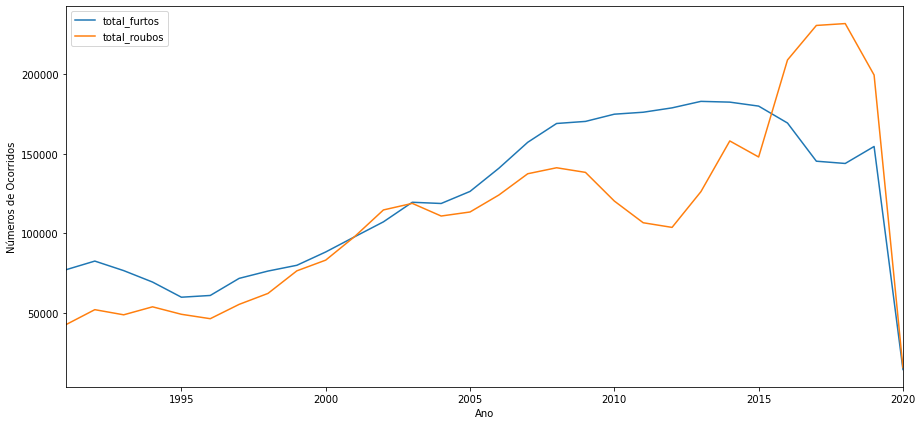

In [153]:
total_furtos_roubos.plot(figsize=(15,7))
plt.ylabel('Números de Ocorridos')
plt.xlabel('Ano')
plt.show()

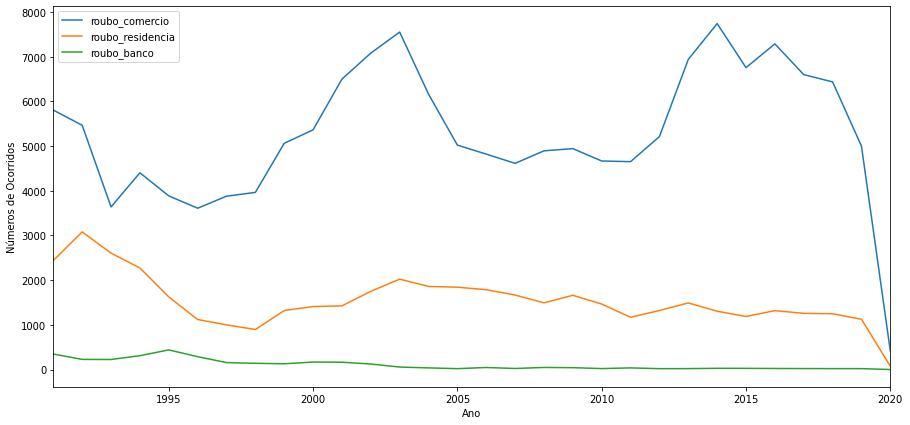

In [154]:
df_3.plot(figsize=(15,7))
plt.ylabel('Números de Ocorridos')
plt.xlabel('Ano')
plt.show()

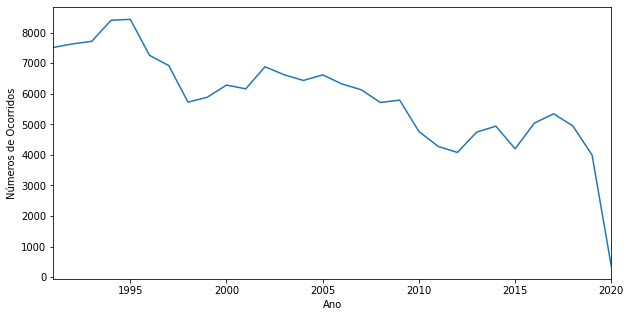

In [155]:
df_4.hom_doloso.plot(figsize=(10,5));
plt.ylabel('Números de Ocorridos')
plt.xlabel('Ano')
plt.show()

---

### **Conclusão**

A partir da presente análise realizada, podemos concluir que, apesar de várias políticas de segurança públicas terem sido implantadas no Rio de Janeiro desde 1991, o estado ainda enfrenta um cenário preocupante, apresentando altos índices de violência englobando diversas situações.

No ano de 2019 tivemos os totais de 154521 casos de furtos e 199347 casos de roubos. Até a data de publicação deste artigo, o ano de 2020 já registrou 14644 furtos e 15881 roubos no estado do Rio de Janeiro. Os últimos anos vêm apresentando uma diminuição significativa nesses índeces, apesar de ainda serem considerados alarmantes.

Em específico, considerando todos os casos de furto de veículos registrados, obtemos uma média de 1668,3 furtos de 1991 até o presente de 2020.  Já os roubos atingem a média de 2456,55 casos. Sendo que diante desses ocorridos, houve um percentual de cerca de 43,02% de veículos recuperados.

O cenário de violência no RJ se extende também para o comércio, bancos e residências pessoais. Considerandotodo o histórico de ocorrências o ano de 2014 registrou o maior número de Roubos de Comércios (7742 ocorridos), enquanto o ano de 1992 foi o que apresentou a maior quantidade de Roubos de Residências (3080 ocorridos) e 1995 teve o maior registro de Roubos de Bancos (440 ocorridos). O ano de 2019 (ano mais recente com a base de dados completa), apresenta uma grande redução em todos os casos analisados acima, registrando 5000, 1125 e 21 casos respectivamente.

Os ocorrências de homicídios dolosos, ou seja, quando há a intenção de matar, apresentou seu ápice em 1995, tendo sido registrados 8438 casos no Rio de Janeiro. O ano de 2019 teve 3995 casos comtabilizados, o que corresponde a uma redução de 19,3% em relação a 2018. O ano de 2020 já registrou 349 homícios dolosos no estado.

---